# Tamanho da amostra

### Cálculo do tamanho amostral baseado na estimativa da média populacional

#### População Infinita

Uma população é considerada infinita quando seu tamanho é muito grande.

Ao realizar o cálculo do tamanho da amostra $n$, deve-se levar em consideração o erro $\epsilon$ máximo que deseja-se assumir (ao estimar a função paramétrica) e o nível de confiança do resultado (probabilidade). Sendo assim, o problema consiste em determinar $n$ de forma que:

$$P(\mid \overline{X} - \mu \mid \leq \epsilon) \simeq 1 - \alpha $$

Mas pelo Teorema Central do Limite, a equação acima pode ser reescrita como:

$$P \left(\mid \overline{X} - \mu \mid \leq z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) \simeq 1 - \alpha $$

Sendo assim, dados um erro máximo e nível de confiança, calcular o tamanho amostral consiste em:

$$ z_{\alpha/2}\frac{\sigma}{\sqrt{n}} = \epsilon  \Longrightarrow n = \left(\frac{z_{\alpha/2}\sigma}{\epsilon }\right) ^2 $$

#### População Finita

No caso em que o tamanho populacional não é tão grande, a consideramos finita. **Caso a amostra tenha um tamanho $n$ maior ou igual a 5% do tamanho da população $N$, considera-se que a população é finita**. Neste caso, aplica-se um fator de correção à fórmula vista anteriormente:

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

#### Principais níveis de confiança usados

<table>
    <th style="text-align: center; border: 1px solid black">Grau de Confiança</th>
    <th style="text-align: center; border: 1px solid black">$\alpha$</th>
    <th style="text-align: center; border: 1px solid black">$z_{\alpha/2}$</th>
    <tr style=" border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">90%</td>
        <td style="text-align: center; border: 1px solid black">0,10</td>
        <td style="text-align: center; border: 1px solid black">1,645</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">95%</td>
        <td style="text-align: center; border: 1px solid black">0,05</td>
        <td style="text-align: center; border: 1px solid black">1,96</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">99%</td>
        <td style="text-align: center; border: 1px solid black">0,01</td>
        <td style="text-align: center; border: 1px solid black">2,575</td>
    </tr>
</table>


#### Variância populacional desconhecida

No caso em que a variância populacional é desconhecida, pode-se realizar uma amostragem aleatória preliminar (ao menos 30 elementos) para estimar a variancia amostral e usa-la na equaçao acima.

$$\widehat{\sigma^2} = s^2 = \frac{\sum_{i=1}^{n}(x_i -\overline{X})^2}{N-1} $$
* Vamos conferir depois

In [6]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


sns.set()

In [2]:
# PNAD - Pesquisa Nacional por Amostra de Domicílios

df = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Aula06/PNAD%20-%202015.csv')

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


**Exemplo**

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

$$  n = \left(\frac{z_{\alpha/2}\sigma}{\epsilon }\right) ^2 $$

In [8]:
erro_maximo = 100

confianca = 0.95

significancia = 1 - confianca

sigma = 3323.39 #desvio padãro populacional

In [7]:
# para calcular o z_alpha_2 -> from scipy.stats import norm

z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

In [9]:
n = (z_alpha_2 * sigma / erro_maximo)**2
n

4242.860955311813

In [10]:
# número inteiro
int(round(n))

4243

Preciso de **4243** observações para chegar ao erro máximo de 100 reais

In [11]:
# Vamos verificar se é verdade:

df['Renda'].mean() # média populacional mu

2000.3831988547631

In [12]:
df['Renda'].std() # desvio padrão da população

3323.3877303470294

In [15]:
# uma amostra
amostra = df.sample(n=4243)
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
13796,22,0,29,8,9,58,1.656076
25423,28,1,65,4,1,0,1.727131
16754,23,0,50,2,1,788,1.621185
25678,28,1,51,8,9,1130,1.787509
31420,29,1,61,8,5,0,1.660219
...,...,...,...,...,...,...,...
19591,25,1,35,8,10,788,1.812537
30174,29,0,37,4,10,900,1.762323
54496,35,0,32,8,5,800,1.658747
9682,16,1,43,8,5,788,1.707039


In [16]:
media_amostral = amostra['Renda'].mean()
media_amostral

1994.0971011077067

In [18]:
erro = (z_alpha_2 * df['Renda'].std() /np.sqrt(n))
erro

99.99993170669197

In [19]:
(media_amostral - erro, media_amostral + erro)

(1894.0971694010148, 2094.0970328143985)

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R\\$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R\\$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R\\$ 1.082,79** e que a **média populacional** é de **R\\$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [20]:
erro_maximo = 10
sigma = 1082.79
media_populacional = 1426.54
confianca = 0.95
significancia = 1 - confianca

In [21]:
z_alpha_2 = norm.ppf(confianca + significancia /2)
z_alpha_2

1.959963984540054

In [23]:
n = (z_alpha_2 * sigma / erro_maximo)**2
n

45038.57638194264

In [24]:
int(round(n))

45039

In [25]:
# se o nível de confiança fosse 99%
erro_maximo = 10
sigma = 1082.79
media_populacional = 1426.54
confianca = 0.99
significancia = 1 - confianca

In [26]:
z_alpha_2 = norm.ppf(confianca + significancia /2)
z_alpha_2

2.5758293035489004

In [27]:
n = (z_alpha_2 * sigma / erro_maximo)**2
n

77789.79583006167

In [28]:
int(round(n))

77790

In [30]:
# Considerando uma população finita
df.shape

(76840, 7)

In [31]:
df[df['Renda']<= 5000].shape

(72109, 7)

In [33]:
N = df[df['Renda']<= 5000].shape[0]
N

72109

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

In [32]:
erro_maximo = 10
sigma = 1082.79
media_populacional = 1426.54
confianca = 0.95
significancia = 1 - confianca

In [34]:
z_alpha_2 = norm.ppf(confianca + significancia /2)
z_alpha_2

1.959963984540054

In [35]:
n = N * (z_alpha_2 * sigma) **2 / ((N-1)*erro_maximo**2 + (z_alpha_2*sigma)**2)
n

27723.274590089608

In [36]:
int(round(n))

27723

Considerando população finita, n = 27723 e considerando popluação infinita n = 45039

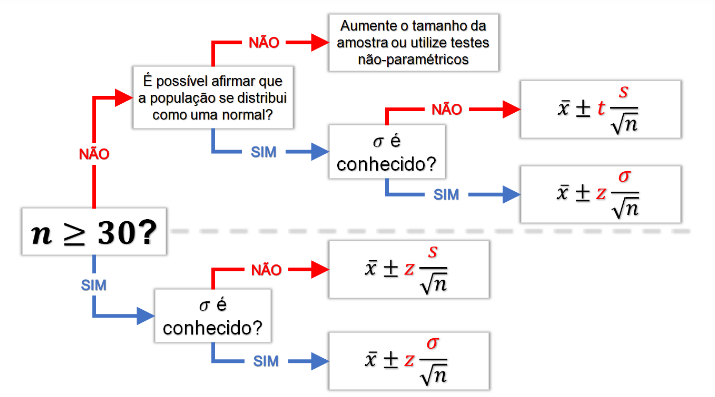

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **500 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?
$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

In [37]:
N = 10000
n = 500 #( 5% da população) -> usar população finita

s = 12 #(desvio padrão amostral)

erro_maximo = 5
confianca = 0.95
significancia = 1 - confianca

In [38]:
z_alpha_2 = norm.ppf(confianca + significancia/2)
z_alpha_2

1.959963984540054

Como não temos o sigma, iremos usar
$$\widehat{\sigma^2} = s^2$$

In [42]:
n = N * (z_alpha_2*s)**2 / ((N -1)*erro_maximo**2 + (z_alpha_2*s)**2)
n

22.08015450019036

In [43]:
int(round(n))

22

Na era do big data, os princípios de amostragem aleatória continuam
importantes quando são necessárias estimativas precisas. A seleção aleatória
de dados pode reduzir o viés e produzir um conjunto de dados de maior
qualidade do que os que resultariam apenas do uso dos dados
convenientemente disponíveis. O conhecimento de diversas distribuições de
amostragem e geração de dados nos permite quantificar potenciais erros em
uma estimativa, os quais podem ser causados por variação aleatória. Ao
mesmo tempo, o bootstrap (amostragem com reposição de um conjunto de
dados observado) é um método “tamanho único” atraente para determinar
possíveis erros em estimativas amostrais.